In [1]:
#原始資料集的training data用沒有 mask 的模型做訓練得到weights A
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define LeNet model
def create_lenet():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define MLP model
def create_mlp():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Compile and train model
def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=128):
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Split data for validation
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

# Train LeNet model
lenet_model = create_lenet()
if os.path.exists("lenet.weights.h5"):
    lenet_model.load_weights("lenet.weights.h5")
else:
    train_model(lenet_model, x_train, y_train, x_val, y_val)

# Train MLP model
#mlp_model = create_mlp()
#train_model(mlp_model, x_train, y_train, x_val, y_val)

# Ensemble predictions
def ensemble_predictions(models, x_test):
    predictions = [model.predict(x_test) for model in models]
    return np.mean(predictions, axis=0)

# Create ensemble of LeNet models
#lenet_ensemble = [create_lenet() for _ in range(10)]
#for model in lenet_ensemble:
#    train_model(model, x_train, y_train, x_val, y_val)

# Get ensemble predictions
#ensemble_preds = ensemble_predictions(lenet_ensemble, x_test)

# Save weights for LeNet model
lenet_model.save_weights('lenet.weights.h5')

# Save weights for MLP model
#mlp_model.save_weights('mlp.weights.h5')

# Save weights for each model in the ensemble
#for i, model in enumerate(lenet_ensemble):
#    model.save_weights(f'lenet_ensemble.weights_{i}.h5')


2024-09-12 12:56:03.068581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 12:56:03.084426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 12:56:03.088594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 12:56:03.101576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 12:56:04.141906: W tensorflow/compiler/tf2

Epoch 1/20


I0000 00:00:1726116969.737439   11504 service.cc:146] XLA service 0x7fdb84005a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726116969.737479   11504 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-09-12 12:56:09.771528: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-12 12:56:10.902296: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 30/391 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5002 - loss: 1.4903

I0000 00:00:1726116974.616387   11504 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8367 - loss: 0.5136 - val_accuracy: 0.9803 - val_loss: 0.0664
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9728 - loss: 0.0907 - val_accuracy: 0.9861 - val_loss: 0.0494
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9805 - loss: 0.0637 - val_accuracy: 0.9871 - val_loss: 0.0433
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0504 - val_accuracy: 0.9883 - val_loss: 0.0397
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0419 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9881 - val_loss: 0.0398
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9902 - val_loss: 0.0402
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9885 - va

In [2]:
import numpy as np
import tensorflow as tf
from collections import Counter

def single_data_rotate_roll_preprocessing(original_data, angle, pixels):
    new_data = np.copy(original_data).astype(np.float32)
    #new_data = np.expand_dims(new_data, axis=-1)
    new_data = np.expand_dims(new_data, axis=0)  # 增加批次維度
    angle = np.deg2rad(angle)
    new_data = tf.image.rot90(new_data, k=int(angle // (np.pi / 2)))
    new_data = np.roll(new_data, pixels, axis=-1)
    return new_data

def single_data_bzq_mask_preprocessing(original_data, start_x, start_y, len_x, len_y, magnification):
    new_data = np.copy(original_data)
    new_data[start_y:start_y + len_y, start_x:start_x + len_x] *= magnification
    #new_data = np.expand_dims(new_data, axis=-1)  # 增加通道維度
    return new_data

lenet_model = create_lenet()
lenet_model.load_weights('lenet.weights.h5')

bzq = []
bzq_acc = []
bzq_conf = []

correct_predictions = []
incorrect_predictions = []

x_test = np.array(x_test)

original_predictions = lenet_model.predict(x_test, verbose=0)

for i in range(len(original_predictions)):
    if np.argmax(original_predictions[i]) == np.argmax(y_test[i]):
        correct_predictions.append(i)
    else:
        incorrect_predictions.append(i)

# 預先計算旋轉和滾動的資料
preprocessed_data = [single_data_rotate_roll_preprocessing(x_test[k], 0, 0) for k in range(10000)]

# bzq modifying
len_x = 2
len_y = 2
stride_x = 2
stride_y = 2



for k in range(len(x_test)):
    single_data_bzq_classification_record = []
    targets = []
    for i in range(0, 28 - len_y, stride_y):
        for j in range(0, 28 - len_x, stride_x):
            target = single_data_bzq_mask_preprocessing(preprocessed_data[k], i, j, len_x, len_y, 0)
            targets.append(target)

    # 批次預測
    predictions = lenet_model.predict(np.vstack(targets), verbose=0)
    max_bzq_indices = np.argmax(predictions, axis=1)
    
    single_data_bzq_classification_record.extend(max_bzq_indices)
    
    counter = Counter(single_data_bzq_classification_record)
    most_common_num, most_common_count = counter.most_common(1)[0]
    
    bzq.append((len(single_data_bzq_classification_record) - most_common_count) / len(single_data_bzq_classification_record))
    bzq_acc.append(np.sum(single_data_bzq_classification_record == np.argmax(y_test[k])) / len(single_data_bzq_classification_record))
    bzq_conf.append(most_common_count / len(single_data_bzq_classification_record))

    original_data = single_data_bzq_mask_preprocessing(preprocessed_data[k], 0, 0, 0, 0, 0)
    original_prediction = lenet_model.predict(original_data, verbose=0)

    max_original_index = np.argmax(original_prediction)

print(f"{incorrect_predictions}")

[92, 259, 321, 340, 359, 445, 543, 582, 583, 691, 720, 844, 882, 947, 1014, 1033, 1039, 1181, 1226, 1232, 1247, 1260, 1299, 1319, 1364, 1393, 1414, 1530, 1554, 1621, 1641, 1681, 1717, 1790, 1878, 1901, 2035, 2118, 2129, 2130, 2135, 2280, 2293, 2387, 2406, 2414, 2462, 2488, 2582, 2597, 2654, 2720, 2760, 2810, 2863, 2896, 2921, 2927, 2939, 3060, 3073, 3422, 3503, 3520, 3558, 3599, 3727, 3808, 3853, 3985, 4075, 4126, 4163, 4176, 4205, 4224, 4248, 4256, 4289, 4360, 4369, 4405, 4443, 4500, 4571, 4699, 4731, 4740, 4761, 4807, 4823, 4956, 5752, 5937, 5955, 5997, 6173, 6505, 6555, 6576, 6597, 6625, 6740, 8059, 9015, 9638, 9642, 9664, 9679, 9692, 9729, 9770, 9982]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9887
113


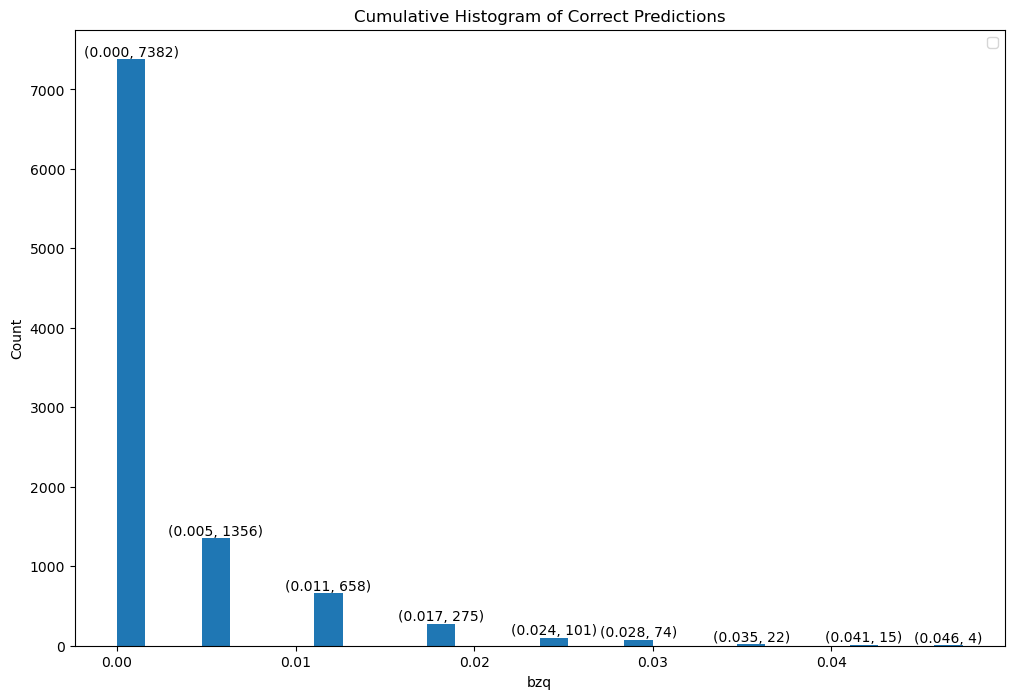

[0.0007889546351084812, 0.005522682445759369, 0.011834319526627219, 0.01814595660749507, 0.02445759368836292, 0.029191321499013805, 0.03550295857988166, 0.04181459566074951, 0.046548323471400394]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


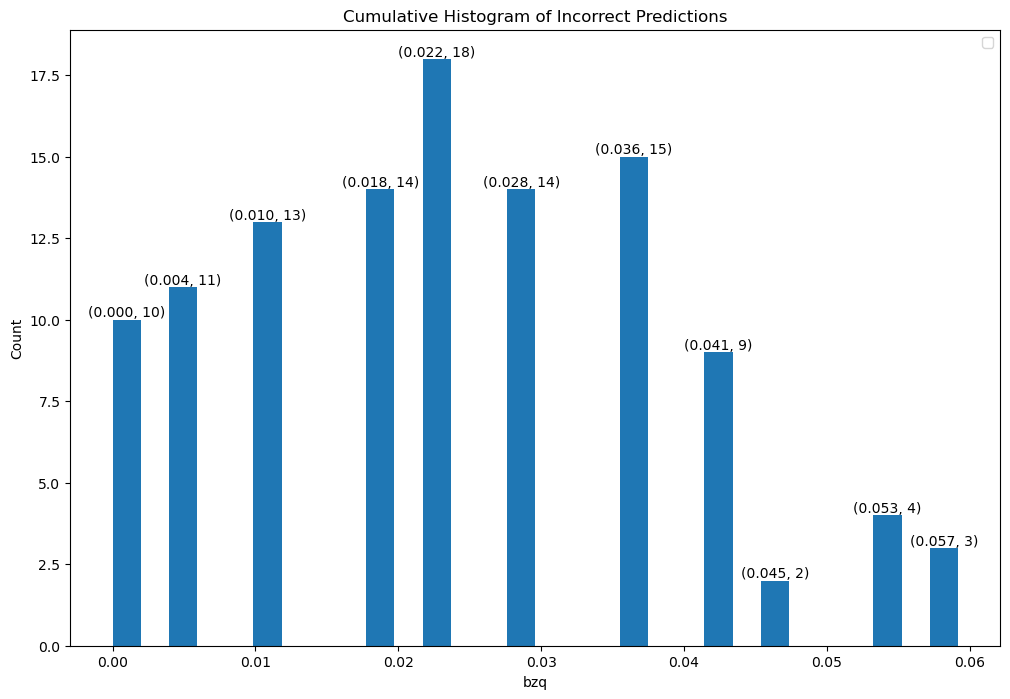

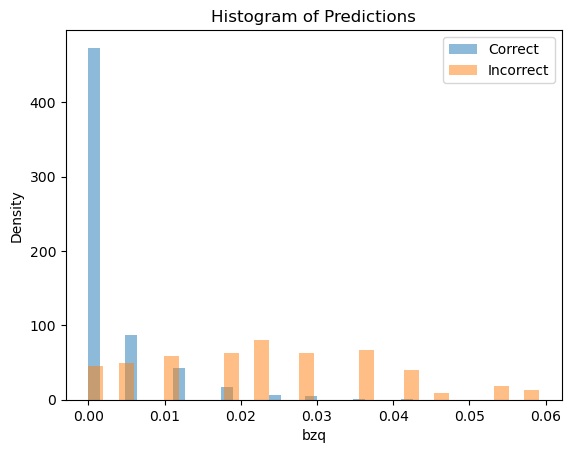

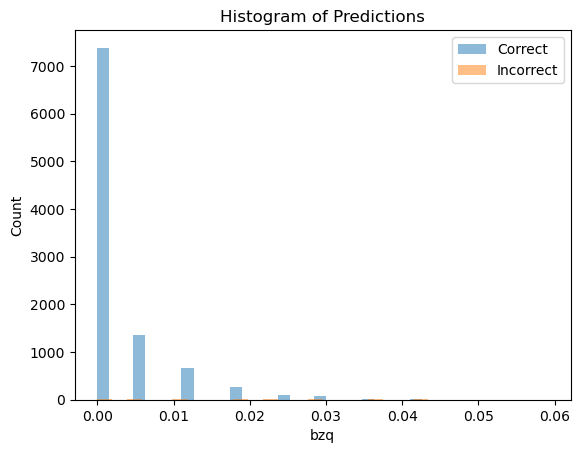

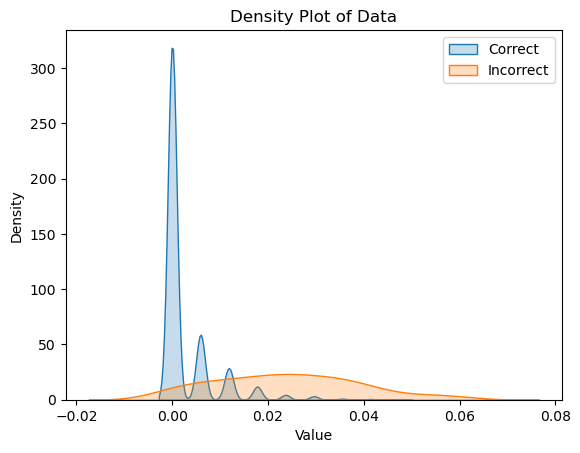

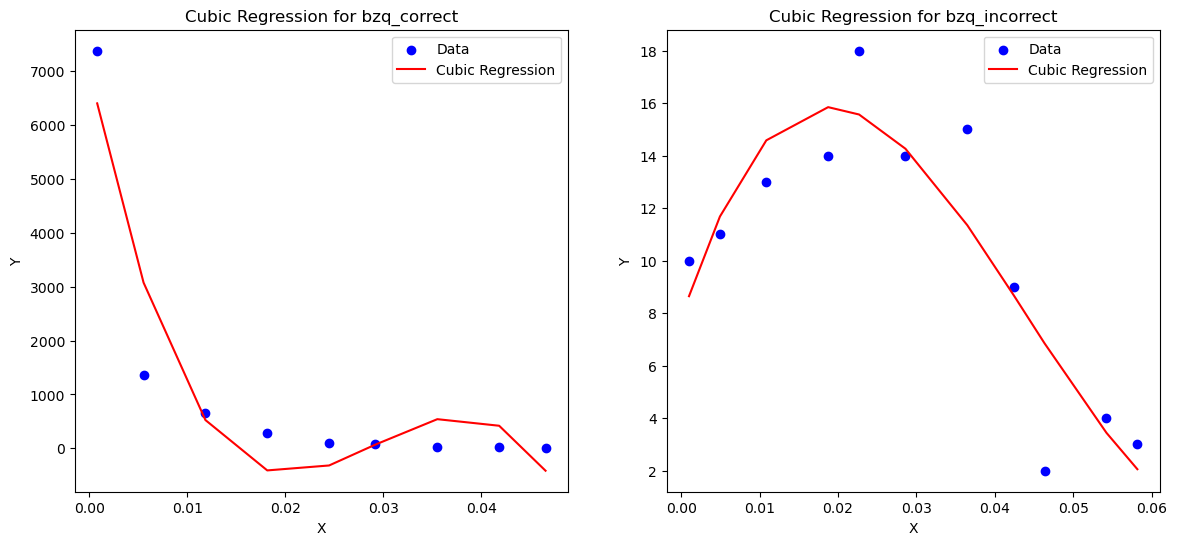

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures


bzq_correct = np.array([bzq[i] for i in correct_predictions])
bzq_incorrect = np.array([bzq[i] for i in incorrect_predictions])

x_bzq_correct = []
y_bzq_correct = []
x_bzq_incorrect = []
y_bzq_incorrect = []

print(len(bzq_correct))
print(len(bzq_incorrect))


# 繪製正確預測的直方圖
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(bzq_correct, bins=30)
plt.title('Cumulative Histogram of Correct Predictions')
plt.xlabel('bzq')
plt.ylabel('Count')
plt.legend(loc='upper right')  # 指定圖例位置

# 在每個柱子上標示數字，排除數值為 0 的情況
for count, bin in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(bin + (bins[1] - bins[0]) / 2, count, f'({bin:.3f}, {int(count)})', ha='center', va='bottom')
        x_bzq_correct.append(bin + (bins[1] - bins[0]) / 2)
        y_bzq_correct.append(count)

plt.show()

print(x_bzq_correct)

# 繪製錯誤預測的直方圖
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(bzq_incorrect, bins=30)
plt.title('Cumulative Histogram of Incorrect Predictions')
plt.xlabel('bzq')
plt.ylabel('Count')
plt.legend(loc='upper right')  # 指定圖例位置

# 在每個柱子上標示數字，排除數值為 0 的情況
for count, bin in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(bin + (bins[1] - bins[0]) / 2, count, f'({bin:.3f}, {int(count)})', ha='center', va='bottom')
        x_bzq_incorrect.append(bin + (bins[1] - bins[0]) / 2)
        y_bzq_incorrect.append(count)

plt.show()

# 對比
plt.hist(bzq_correct, bins=30, alpha=0.5, label='Correct', density=True)
plt.hist(bzq_incorrect, bins=30, alpha=0.5, label='Incorrect', density=True)

plt.title('Histogram of Predictions')
plt.xlabel('bzq')
plt.ylabel('Density')
plt.legend(loc='upper right')  # 添加圖例以區分兩組數據
plt.show()

# 對比
plt.hist(bzq_correct, bins=30, alpha=0.5, label='Correct')
plt.hist(bzq_incorrect, bins=30, alpha=0.5, label='Incorrect')

plt.title('Histogram of Predictions')
plt.xlabel('bzq')
plt.ylabel('Count')
plt.legend(loc='upper right')  # 添加圖例以區分兩組數據
plt.show()

sns.kdeplot(bzq_correct, fill=True, label='Correct')
sns.kdeplot(bzq_incorrect, fill=True, label='Incorrect')

plt.title('Density Plot of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()  # 添加圖例以區分兩條曲線
plt.show()
